In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('wine').getOrCreate()

In [2]:
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType,DoubleType)

redData = spark.read.format("csv").option("header", "true").load("./data/winequality-red.csv")
col=redData.columns

data_schema = [StructField(col[0],DoubleType(),True),
              StructField(col[1],DoubleType(),True),
              StructField(col[2],DoubleType(),True),
              StructField(col[3],DoubleType(),True),
              StructField(col[4],DoubleType(),True),
              StructField(col[5],DoubleType(),True),
              StructField(col[6],DoubleType(),True),
              StructField(col[7],DoubleType(),True),
              StructField(col[8],DoubleType(),True),
              StructField(col[9],DoubleType(),True),
              StructField(col[10],DoubleType(),True),
              StructField(col[11],IntegerType(),True)]
final_struct = StructType(fields=data_schema)

redData = spark.read.format("csv").option("header", "true").load("./data/winequality-red.csv", schema=final_struct)
whiteData = spark.read.format("csv").option("header", "true").load("./data/winequality-white.csv", schema=final_struct)


from pyspark.sql.functions import lit

redData=redData.withColumn("color", lit('red'))
whiteData=whiteData.withColumn("color", lit('white'))

combinedData = redData.union(whiteData)
col=combinedData.columns

In [18]:
from pyspark.sql.functions import log
combinedData.withColumn("log residual sugar",log("residual sugar")).select(["residual sugar","log residual sugar"]).show()

+--------------+-------------------+
|residual sugar| log residual sugar|
+--------------+-------------------+
|           1.9| 0.6418538861723947|
|           2.6| 0.9555114450274363|
|           2.3| 0.8329091229351039|
|           1.9| 0.6418538861723947|
|           1.9| 0.6418538861723947|
|           1.8| 0.5877866649021191|
|           1.6|0.47000362924573563|
|           1.2| 0.1823215567939546|
|           2.0| 0.6931471805599453|
|           6.1| 1.8082887711792655|
|           1.8| 0.5877866649021191|
|           6.1| 1.8082887711792655|
|           1.6|0.47000362924573563|
|           1.6|0.47000362924573563|
|           3.8|   1.33500106673234|
|           3.9| 1.3609765531356006|
|           1.8| 0.5877866649021191|
|           1.7| 0.5306282510621704|
|           4.4| 1.4816045409242156|
|           1.8| 0.5877866649021191|
+--------------+-------------------+
only showing top 20 rows



{'boxes': [<matplotlib.lines.Line2D at 0x7fe3253428d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe325346128>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe325346da0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe325346978>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe3253426d8>,
  <matplotlib.lines.Line2D at 0x7fe325342cc0>]}

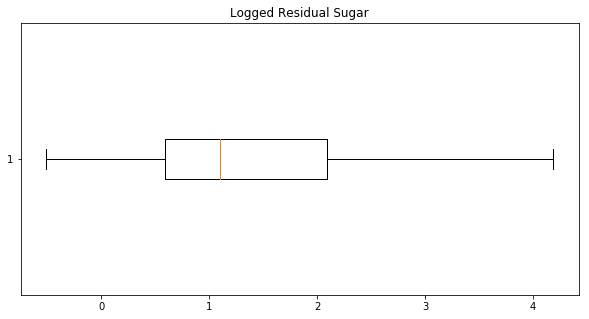

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [10, 5]

fig1, ax1 = plt.subplots()
ax1.set_title("Logged Residual Sugar")
plt.boxplot(x=np.asarray(combinedData.withColumn("log residual sugar",log("residual sugar")).select(["log residual sugar"]).collect()),vert=False)